In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Task 1: Loading and Inspecting the Data

We will be working with a dataset of audiobooks downloaded from audible.in from 1998 to 2025 (pre-planned releases). [Source](https://www.kaggle.com/datasets/snehangsude/audible-dataset)

The first thing we will do is load the raw audible data.

### Instructions:
* Using pandas, read the `audible_raw.csv` file that is located inside the `data` folder in our local directory. Assign to `audible`.
* Show the first few rows of the `audible` data frame.

In [3]:
# Load the audible_raw.csv file
audible = pd.read_csv('audible_raw.csv')
# View the first rows of the dataframe
audible.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


### 💾 The data

- "name" - The name of the audiobook.
- "author" - The audiobook's author.
- "narrator" - The audiobook's narrator.
- "time" -  The audiobook's duration, in hours and minutes.
- "releasedate" -  The date the audiobook was published.
- "language" -  The audiobook's language.
- "stars" -  The average number of stars (out of 5) and the number of ratings (if available).
- "price" -  The audiobook's price in INR (Indian Rupee).

 We can use the `.info()` method to inspect the data types of the columns

In [4]:
# Inspect the columns' data types
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


## Task 2: Clean text data in Author and Narrator columns

We will start cleaning some of the text columns like `author` and `narrator`. We can remove the `Writtenby:` and `Narratedby:` portions of the text in those columns.

For this, we will use the `.str.replace()` method

### Instructions:
* Remove 'Writtenby:' from the `author` column
* Remove 'Narratedby:' from the `narrator` column
* Check the results

In [5]:
# Remove Writtenby: from the author column
audible['author'] = audible['author'].str.replace('Writtenby:', '')
# Remove Narratedby: from the narrator column
audible['narrator'] = audible['narrator'].str.replace('Narratedby:', '')
# Check the results
audible.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,SuzanneCollins,TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,WinterMorgan,LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,RickRiordan,RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,MaryPopeOsborne,MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,RickRiordan,RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


## Task 3: Extract number of stars and ratings from Stars column.

The `stars` column combines the number of stars and the number of ratins. Let's turn this into numbers and split it into two columns: `rating_stars` and `n_ratings`.

First we will use the `.sample()` method to get a glimpse at the type of entries in that column.

In [6]:
# Get a glimpse of the stars column
audible.stars.sample(n = 10)

44057     5 out of 5 stars1 rating
68405                Not rated yet
33730     2 out of 5 stars1 rating
27266                Not rated yet
42438                Not rated yet
61230    5 out of 5 stars4 ratings
26532                Not rated yet
60961                Not rated yet
70576                Not rated yet
70107                Not rated yet
Name: stars, dtype: object

Since there are many instances of `Not rated yet`, let's filter them out and sample again:

In [7]:
# Explore the values of the star column that are not 'Not rated yet'
audible[audible.stars != 'Not rated yet'].sample(n =10)

,name,author,narrator,time,releasedate,language,stars,price
82889,Again Again,E.Lockhart,TaviaGilbert,6 hrs and 7 mins,02-06-20,English,3 out of 5 stars1 rating,"1,328.00"
27395,Execution,"LarryBossidy,RamCharan",JohnBedfordLloyd,8 hrs and 14 mins,14-06-02,English,4.5 out of 5 stars73 ratings,879.00
1016,Point Blanc,AnthonyHorowitz,OliverChris,5 hrs and 40 mins,30-01-20,English,5 out of 5 stars6 ratings,569.00
34496,The Dental Diet,Dr.StevenLin,StevenLin,7 hrs and 57 mins,09-01-18,English,4.5 out of 5 stars3 ratings,668.00
29859,Speak to Win,BrianTracy,BrianTracy,5 hrs and 13 mins,20-11-08,English,4.5 out of 5 stars12 ratings,468.00
59270,Rise of a Queen,RinaKent,"ShaneEast,KeiraStevens",8 hrs and 44 mins,19-11-20,English,5 out of 5 stars1 rating,668.00
32132,Running is My Therapy,"ScottDouglas,AlisonMariellaDésir",StephenR.Thorne,6 hrs and 52 mins,17-04-18,English,4 out of 5 stars1 rating,586.00
38256,"The History of Rome, Volume 1, Books 1 - 5","TitusLivy,WilliamMasfenRoberts-translator",CharltonGriffin,18 hrs and 16 mins,26-08-10,English,5 out of 5 stars2 ratings,"1,003.00"
59190,Mercy,DavidBaldacci,"BrittanyPressley,KyfBrewer",11 hrs and 56 mins,25-11-21,English,4 out of 5 stars5 ratings,323.00
54875,The Undomestic Goddess,SophieKinsella,PhoebeJames,12 hrs and 26 mins,10-01-07,English,3.5 out of 5 stars5 ratings,"1,067.00"


As a first step, we can replace the instances of `Not rated yet` with `NaN`

In [8]:
# Replace 'Not rated yet' with NaN
audible['stars'].replace('Not rated yet', np.nan, inplace = True)

We can use `.str.extract()` to get the number of stars and the number of ratings into their own columns.

### Instructions:
* Extract the number of stars into the `rating_stars` column
* Extract the number of ratings into the `n_ratings` column
* Convert both new columns to float

In [9]:
import pandas as pd

# Assuming 'audible' is a DataFrame containing the data
# Extract number of stars into rating_stars and turn into float
audible['rating_stars'] = audible['stars'].str.extract('^([\d.]+)').astype(float)
# Replace the comma, extract number of ratings into n_ratings and turn into float
audible['n_rating'] = audible['stars'].str.replace(',', '').str.extract('(\d+) ratings').astype(float)

# Examine the new rating_stars and n_ratings columns
audible[['rating_stars', 'n_rating']]

,rating_stars,n_rating
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0
...,...,...
87484,NaN,NaN
87485,NaN,NaN
87486,NaN,NaN
87487,NaN,NaN


As a last step, let's delete the `stars` column using the `.drop` command:

In [10]:
# Drop the stars column
audible.drop(columns = ['stars'], axis = 1, inplace = True)
# Check the results
audible.head()

,name,author,narrator,time,releasedate,language,price,rating_stars,n_rating
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181.0


## Task 4: Change data types

Another important step is to have our data in the correct data types

### Instructions:
* Set `price` to float
* Turn `rating_stars` to category
* Convert `releasedate` to datetime

In [11]:
# Explore the price column
audible.price.head(10)

0      468.00
1      820.00
2      410.00
3      615.00
4      820.00
5      656.00
6      233.00
7      820.00
8    1,256.00
9      820.00
Name: price, dtype: object

We need to get rid of the comma and the word 'Free' before we can convert the data.

In [12]:
# Replace the comma with ''
audible['price'] = audible['price'].str.replace(',', '')
# Replace 'Free' with 0
audible['price'] = audible['price'].apply(lambda x: 0.0 if x == 'Free' else x)
# Turn price to float
audible['price'] = audible.price.astype(float)
#audible.price.dtype

* Turn `rating_stars` to category

Since `stars` can only take a small number of discrete values, the best data type for the column is `category`.

Let's first look at the unique values in that column to confirm:

In [13]:
# Look at the unique values in the rating_stars column
audible.rating_stars.unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

We can now use `.astype` to change the data type.

In [14]:
# Turn rating_stars to category
audible['rating_stars'] = audible.rating_stars.astype('category')

audible.rating_stars.dtype

CategoricalDtype(categories=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ordered=False)

* Convert `releasedate` date to datetime

Here we will use the `to_datetime()` function to turn the dates into datetime objects:

In [15]:
# Convert releasedate to datetime
audible['releasedate']  = pd.to_datetime(audible.releasedate)
# Inspect the dataframe 
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   n_rating      9250 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB


## Task 5: Extract hours and minutes from the `time` column

The `time` column combines the number of hours and minutes into one column. We want to transform and consolidate the information into a new `time_minutes` column.

In [16]:
# Explore the values in the time column
audible.time.sample(n = 10)

15141    2 hrs and 31 mins
5592       1 hr and 6 mins
14540    2 hrs and 15 mins
47672                 1 hr
21718    9 hrs and 48 mins
83794    7 hrs and 27 mins
75       6 hrs and 58 mins
19054              36 mins
65958    5 hrs and 34 mins
84009    4 hrs and 49 mins
Name: time, dtype: object

Let's see what other ways they have encoded `min` or `minutes`:

In [17]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
print(audible.time[audible.time.str.contains('minute')].sample(n = 10).head(10))
#print(audible.time[audible.time.str.contains('hr')].sample(n = 10).head(10))


1404     Less than 1 minute
10886    Less than 1 minute
10189    Less than 1 minute
87058    Less than 1 minute
55648    Less than 1 minute
10897    Less than 1 minute
87059    Less than 1 minute
87110    Less than 1 minute
87090    Less than 1 minute
87069    Less than 1 minute
Name: time, dtype: object


We can see that we need to fix the following:
* hr, hrs -> consolidate as `hr`
* min, mins -> consolidate as `min`
* Less than 1 minute -> round to 1 min

In [18]:
# Replace hrs, mins, and 'Less than 1 minute'
audible['time'] = audible['time'].str.replace('hrs', 'hr')
audible['time'] = audible['time'].str.replace('mins', 'min')
audible['time'] = audible['time'].str.replace('Less than a minute', '1 min')

Let's see how it looks now:

In [19]:
# Check the results
audible[['time']].head()

,time
0,2 hr and 20 min
1,13 hr and 8 min
2,2 hr and 3 min
3,11 hr and 16 min
4,10 hr


The next step is to extract the number of hours and minutes from the text, then combine in a new `time_mins` column.

### Instructions: 
* Extract the number of hours from `time`. Assign to the `hours` variable.
* Extract the number of minutes from `time`. Assign to the `mins` variable.
* Create the `time_mins` column combining hours and minutes.

In [20]:
# Extract the number of hours, turn to integer
hours = audible['time'].str.extract('(\d+) hr').fillna(0).astype(int)
# Extract the number of minutes, turn to integer
mins = audible['time'].str.extract('(\d+) min').fillna(0).astype(int)
# Combine hours and minutes into the time_mins column
audible['time_in_minutes'] = (hours * 60) + mins
# Check the results
audible[['time_in_minutes']].head()

,time_in_minutes
0,140
1,788
2,123
3,676
4,600


And as final step, let's delete the columns we don't need any more:

In [21]:
# Drop the time column
audible.drop(columns = ['time'], axis = 1, inplace = True)

Here is how our dataframe looks now:

In [22]:
# Inspect the dataframe 
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             87489 non-null  object        
 1   author           87489 non-null  object        
 2   narrator         87489 non-null  object        
 3   releasedate      87489 non-null  datetime64[ns]
 4   language         87489 non-null  object        
 5   price            87489 non-null  float64       
 6   rating_stars     15072 non-null  category      
 7   n_rating         9250 non-null   float64       
 8   time_in_minutes  87489 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 5.1+ MB


## Task 6: Check data ranges

Another important step is to confirm that the values in our columns are in the expected ranges and that we don't have out-of-range values.

Let's create a histogram of the numeric columns to visually inspect ht ranges and the shape of the distribution:

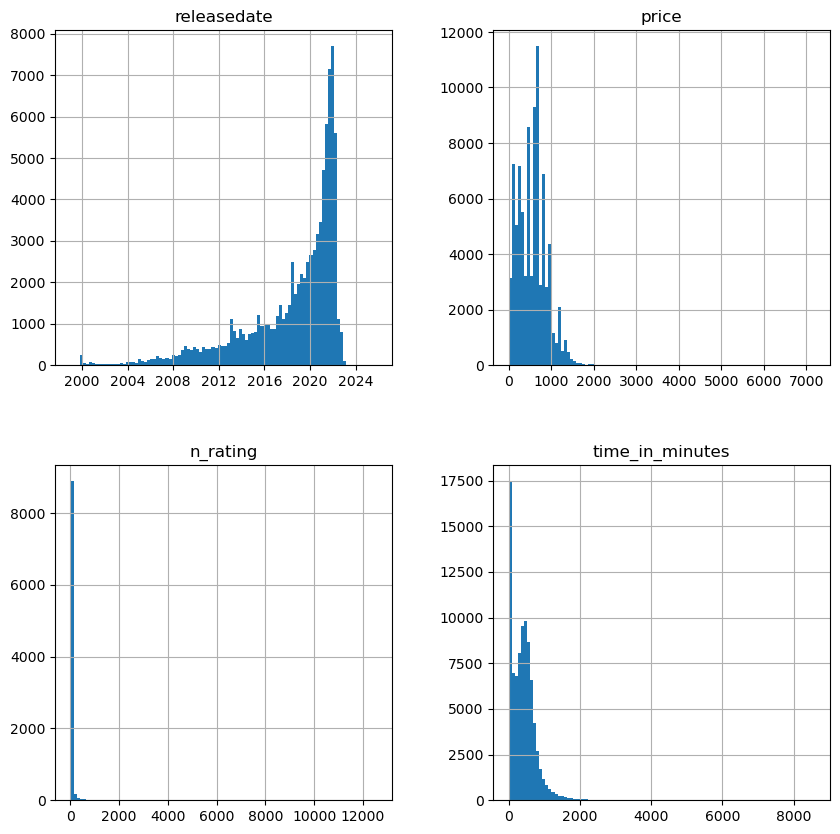

In [23]:
# Plot histograms of all the numerical columns
audible.hist(figsize =(10,10), bins = 100)
plt.show()

Additionally, we can use `.describe()` to look at a summary of our data

In [24]:
# Look at the numeric columns
audible.describe()

,price,n_rating,time_in_minutes
count,87489.000000,9250.000000,87489.000000
mean,559.009246,34.587243,417.497663
std,336.096642,264.025444,364.559399
min,0.000000,2.000000,1.000000
25%,268.000000,2.000000,142.000000
50%,585.000000,5.000000,386.000000
75%,755.000000,14.000000,584.000000
max,7198.000000,12573.000000,8595.000000


In [25]:
# Look at the non numeric columns
audible.describe(exclude=[np.number])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22296\2838511557.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  audible.describe(exclude=[np.number])


,name,author,narrator,releasedate,language,rating_stars
count,87489,87489,87489,87489,87489,15072.0
unique,82767,48374,29717,5058,36,9.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,2018-05-16 00:00:00,English,5.0
freq,20,874,1034,773,61884,6761.0
first,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN


We will transform the prices in `price` to USD for this exercise. We can use the exchange rate of 1 USD = 0.012 INR:

In [26]:
# Transform prices to USD (multiply times 0.012)
audible['price'] = audible.price * 0.012
# Check the results
audible.price.describe()

count    87489.000000
mean         6.708111
std          4.033160
min          0.000000
25%          3.216000
50%          7.020000
75%          9.060000
max         86.376000
Name: price, dtype: float64

There values in the `language` column have different capitalization. Let's fix that.

In [27]:
# Inspect the language column before making changes
audible.language.unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [29]:
# Update capitalization in the language column
audible['language'] = audible.language.str.capitalize()
# Check the results
audible.language.unique()

array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', 'Lithuanian'], dtype=object)

## Task 7: Checking for duplicates

How many duplicates do we have?

As a first step look for duplicates using `.duplicated()` and `.sum()`:

In [ ]:
# Look for duplicate rows


It is useful to look for duplicates only using a subset of the columns that make sense. We will use the following subset of columns:
* name
* author
* narrator
* time_mins
* price

Here we use `.duplicated()` again, but with our subset of columns.

In [ ]:
# Create a list of our subset columns and assign to subset_cols

# Check for duplicates using our subset of columns


Let's look at those values (use `keep=false`) and see what is going on:

In [ ]:
# Check the duplicated rows keeping the duplicates and order by the name column


We can see that the duplicates are for files with different release dates. We can decide to keep the record with the last release date.

We will can use the `drop_duplicates()` method with the same subset and using `keep=last` to keep the last release date

In [ ]:
# Drop duplicated rows keeping the last release date


We can check again for duplicates:

In [ ]:
# Check again for duplicates using our subset of columns


## Task 8: Dealing with missing data

Before we finish, let's take a look at missing data in our columns. We can use the `.isna()` method and chain it with `.sum()` to get the total:

In [ ]:
# Check for null values


We could turn the **NaN** values to 0 or another numeric value, or we could keep them. It depends on our use case.

If we want to plot the ratings distribution, it can make sense to drop audiobooks with no ratings. But if we need to use the distribution of prices for our analysis, then removing audiobooks with no ratings will bias our results (since unrated audiobooks are likely more niche and might have a different pricing structure than rated audiobooks).

We will keep the unrated audiobooks for now.

## Task 9: Save the cleaned data set

We can use the `.to_csv` method to save the clean file. We include `index=False` so that we don't also copy the current index to our destination file.

In [ ]:
# Save the dataframe to a new file: 'audible_clean.csv'
